# SVM over Different datasets

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [2]:
def svm_classifier(Xtrain,Xtest,Ytrain,Ytest):
    model=SVC(random_state=10,kernel='rbf')
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    print(classification_report(Ypred,Ytest))
    print(confusion_matrix(Ypred,Ytest))

In [4]:
X1,y1 = make_classification(n_samples=1000,n_features=5,n_informative=2,n_redundant=1,random_state=1)
X2,y2 = make_classification(n_samples=10000,n_features=5,n_informative=2,n_redundant=1,random_state=1)
X3,y3 = make_classification(n_samples=100000,n_features=5,n_informative=2,n_redundant=1,random_state=1)
X4,y4 = make_classification(n_samples=10000,n_features=10,n_informative=2,n_redundant=1,random_state=1)
X5,y5 = make_classification(n_samples=10000,n_features=50,n_informative=2,n_redundant=1,random_state=1)
X6,y6 = make_classification(n_samples=10000,n_features=100,n_informative=2,n_redundant=1,random_state=1)
Datasets=[[X1,y1,"Dataset 1"],
         [X2,y2,"Dataset 2"],
         [X3,y3,"Dataset 3"],
         [X4,y4,"Dataset 4"],
         [X5,y5,"Dataset 5"],
         [X6,y6,"Dataset 6"]]
for r in Datasets:
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(r[0],r[1],test_size=0.2)
    svm_classifier(Xtrain,Xtest,Ytrain,Ytest)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        87
           1       0.91      0.85      0.88       113

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200

[[77 10]
 [17 96]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1038
           1       0.94      0.97      0.95       962

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

[[974  64]
 [ 28 934]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10234
           1       0.93      0.95      0.94      9766

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.9

# Feature Extraction: PCA

In [5]:
X,y = make_classification(n_samples=10000,n_features=100,n_informative=2,n_redundant=1,random_state=1)
sc=StandardScaler()
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2)
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)
print("---------------BEFORE PCA-------------")
svm_classifier(Xtrain,Xtest,Ytrain,Ytest)

---------------BEFORE PCA-------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1035
           1       0.87      0.90      0.88       965

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

[[902 133]
 [ 94 871]]


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xscaled,y,test_size=0.2)
pca = PCA(n_components = 0.95)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)
print("---------------AFTER PCA-------------")
svm_classifier(Xtrain,Xtest,Ytrain,Ytest)

---------------AFTER PCA-------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1031
           1       0.90      0.91      0.90       969

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

[[930 101]
 [ 85 884]]


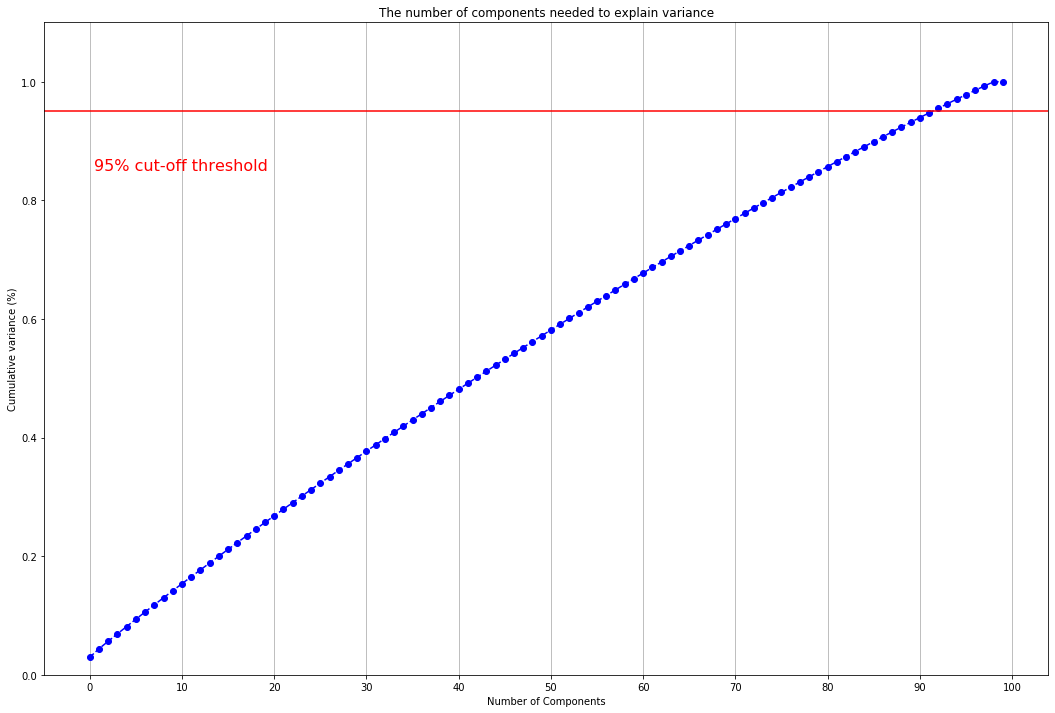

In [28]:
pca = PCA().fit(Xscaled)

plt.rcParams["figure.figsize"] = (18,12)

fig, ax = plt.subplots()
xi = np.arange(0, 100, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 110,step=10)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# 10 Fold Cross Validation

In [14]:
X,y = make_classification(n_samples=10000,n_features=10,n_informative=2,n_redundant=1,random_state=1)
sc=StandardScaler()
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2)
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)

svm_classifier(Xtrain,Xtest,Ytrain,Ytest)

model=SVC(random_state=10,kernel='rbf')
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = Xtrain, y = Ytrain, cv = 10,verbose=1)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1020
           1       0.93      0.95      0.94       980

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

[[948  72]
 [ 45 935]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 94.56 %
Standard Deviation: 0.60 %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished


# Grid Search

In [15]:
X,y = make_classification(n_samples=10000,n_features=10,n_informative=2,n_redundant=1,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

[[1181   47]
 [  90 1182]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1228
           1       0.96      0.93      0.95      1272

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500

Best Accuracy: 94.45 %
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
